[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  37.923973  38.227016  37.923973  38.183727  32.319336  21332437
2020-01-03  38.227016  38.313602  37.620930  38.053848  32.209408  21236055
2020-01-06  37.664219  37.837391  37.491051  37.620930  31.842978  16016306
2020-01-07  37.620930  37.750805  37.404465  37.750805  31.952906  16383256
2020-01-08  37.361176  37.707512  37.361176  37.577637  31.806330  15523197
...               ...        ...        ...        ...        ...       ...
2023-11-21  33.700001  34.200001  33.700001  34.200001  34.200001  33354810
2023-11-22  34.049999  34.150002  33.849998  33.849998  33.849998  15519865
2023-11-23  33.849998  34.049999  33.650002  34.000000  34.000000  16829931
2023-11-24  33.950001  34.099998  33.750000  33.750000  33.750000  20288459
2023-11-27  33.9000

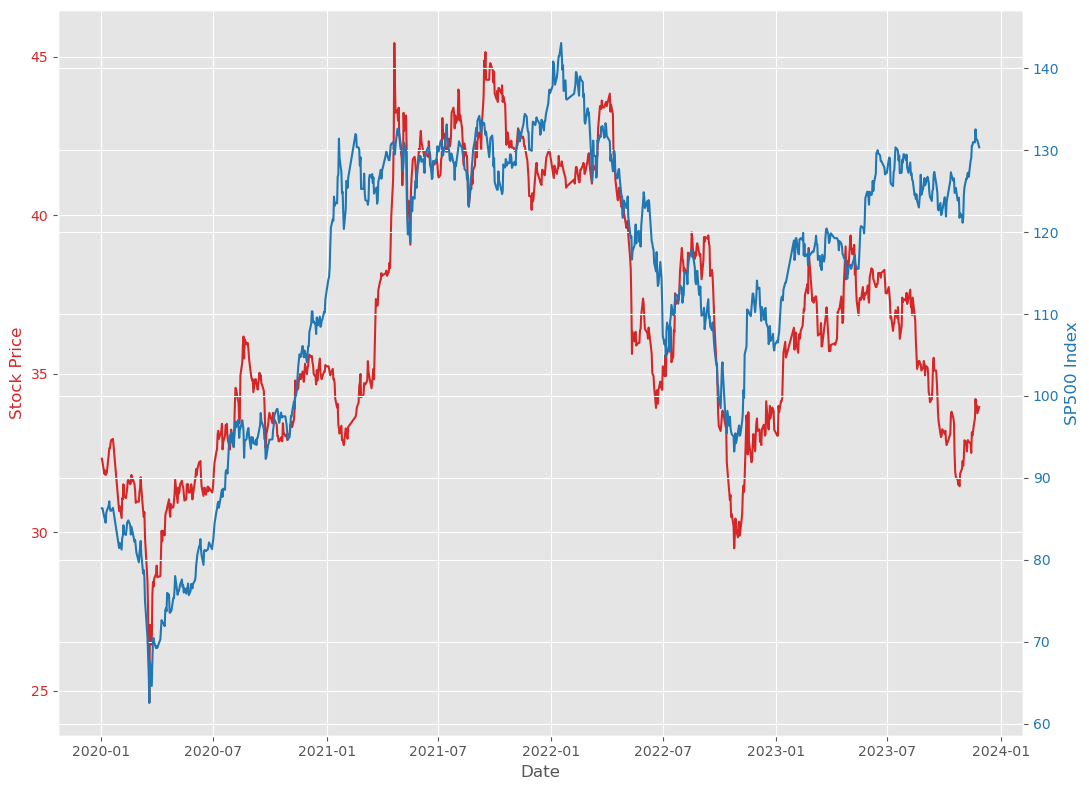

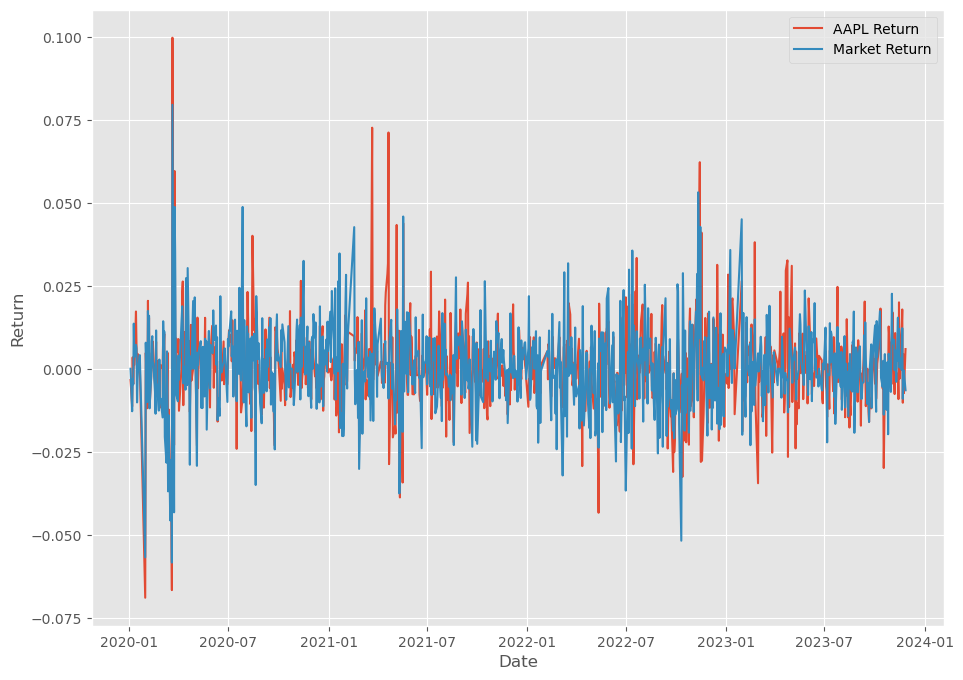

LinregressResult(slope=0.5104604279762132, intercept=-0.00013102177247779936, rvalue=0.5074883745613061, pvalue=3.4219163214610955e-63, stderr=0.02817900427934337, intercept_stderr=0.00035484659877909767)
                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     328.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.42e-63
Time:                        22:45:38   Log-Likelihood:                 2938.4
No. Observations:                 948   AIC:                            -5873.
Df Residuals:                     946   BIC:                            -5863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
     

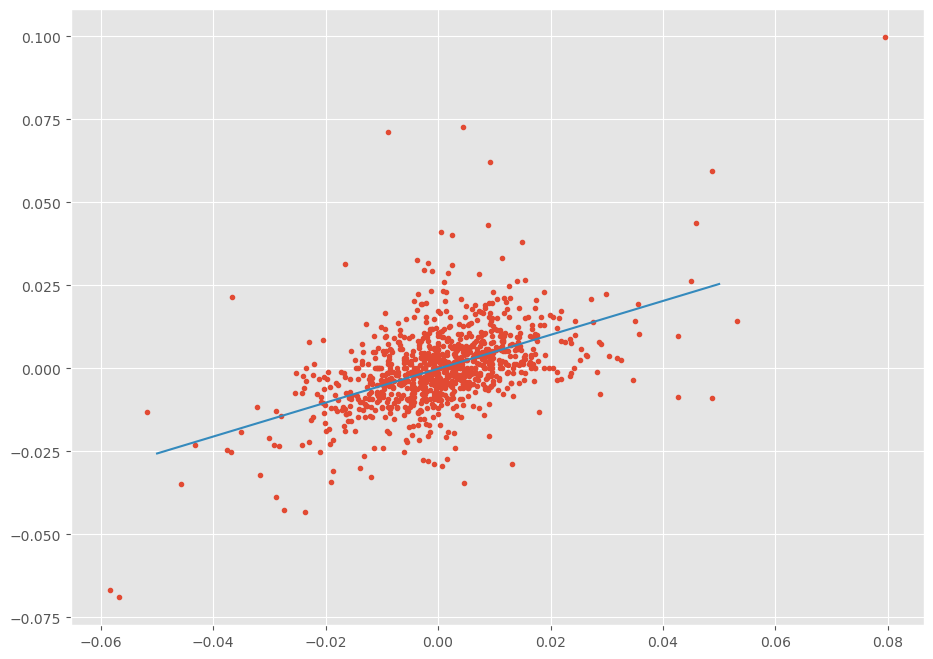

2020 -0.000427 0.7397 0.7688 0.0
2021 0.000478 0.359 0.3195 0.0
2022 -0.000525 0.3696 0.4143 0.0
2023 -0.000303 0.4706 0.3969 0.0
   year     alpha    beta  r_value  p_value
0  2020 -0.000427  0.7397   0.7688      0.0
1  2021  0.000478  0.3590   0.3195      0.0
2  2022 -0.000525  0.3696   0.4143      0.0
3  2023 -0.000303  0.4706   0.3969      0.0


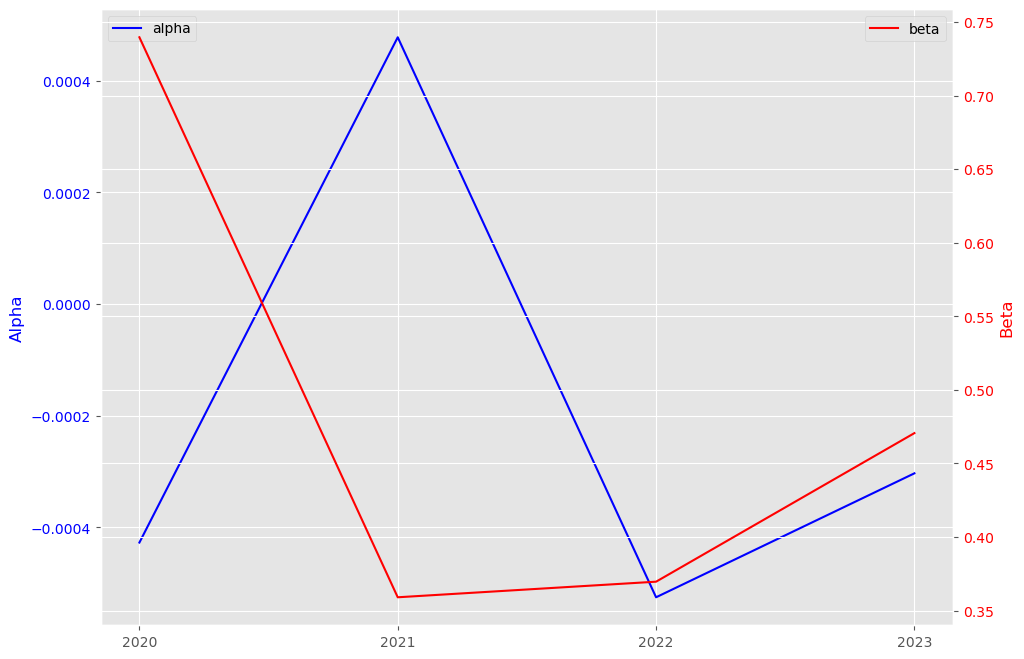

        alpha      beta
0         NaN       NaN
1         NaN       NaN
2         NaN       NaN
3         NaN       NaN
4         NaN       NaN
..        ...       ...
943 -0.000969  0.486748
944 -0.000948  0.522203
945 -0.000966  0.545171
946 -0.001070  0.546880
947 -0.000945  0.525743

[948 rows x 2 columns]


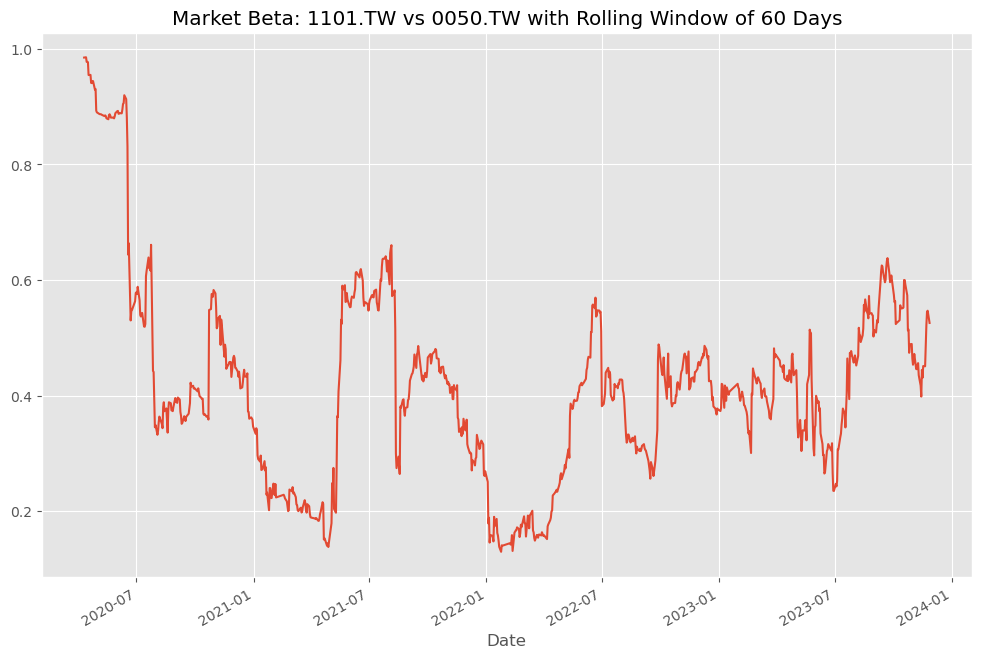

Hedge Ratio (Beta): 0.5045336253310467


In [1]:
#matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas_datareader.data as pddata
import altair as alt
import statsmodels.api as sm

plt.style.use('ggplot')
mpl.rcParams['figure.figsize']= [11, 8]
ticker = '1101.TW'
beg_date = '2020-01-01'
end_date = '2023-11-28'

stock_apple = yf.download(ticker,start=beg_date, end=end_date)
print(stock_apple)

return_apple = stock_apple['Adj Close'] / stock_apple['Adj Close'].shift(1) - 1
return_apple.dropna(inplace=True)
return_apple = return_apple.to_frame()
return_apple.columns = ['ret']
print(return_apple)

ticker = '0050.TW'
sp500 = yf.download(ticker,start=beg_date, end=end_date)
return_market = sp500['Adj Close'] / sp500['Adj Close'].shift(1) - 1
return_market.dropna(inplace=True)
return_market = return_market.to_frame()
return_market.columns = ['ret']
sp500.head()
print(return_market)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_apple.index, stock_apple['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SP500 Index', color=color)  # we already handled the x-label with ax1
ax2.plot(sp500.index, sp500['Adj Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax = plt.subplots()

color = 'tab:red'
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.plot(return_apple.index, return_apple.ret, label='AAPL Return')
ax.plot(return_market.index, return_market.ret, label='Market Return')
ax.legend()
plt.show()

return_market = return_market.reset_index()
return_apple = return_apple.reset_index()

return_market = return_market[return_market['Date'].isin(return_apple['Date'])]
return_apple = return_apple[return_apple['Date'].isin(return_market['Date'])]


results = stats.linregress(return_market['ret'], return_apple['ret'])
print(results)

x = sm.add_constant(return_market['ret'])
ols_results = sm.OLS(return_apple['ret'], x).fit()
print(ols_results.summary())
plt.plot(return_market['ret'], return_apple['ret'], '.')
x = np.linspace(-0.05, 0.05, 100)
y = results.slope * x + results.intercept
plt.plot(x, y)
plt.show()

def ret_f(ticker, beg_date, end_date):
    p = yf.download(ticker,start=beg_date, end=end_date)
    ret = p / p.shift(1)
    return ret.dropna()

return_market.set_index('Date', inplace=True)
return_apple.set_index('Date', inplace=True)


years = return_apple.index.strftime('%Y').unique()
datas = pd.DataFrame()

for year in years:
    y = return_apple.loc[return_apple.index.year == int(year)]
    x = return_market.loc[return_market.index.year == int(year)]
    x_aligned, y_aligned = x.align(y, join='inner')
    if len(x_aligned) != len(y_aligned):
        print(f'Data length mismatch in year {year}: {len(x_aligned)} vs {len(y_aligned)}')
        continue
    (beta,alpha,r_value,p_value,std_err) = stats.linregress(x_aligned.ret, y_aligned.ret)
    alpha = round(alpha, 6)
    beta = round(beta, 4)
    r_value = round(r_value, 4)
    p_value = round(p_value, 4)
    print(year, alpha, beta, r_value, p_value)
    datas = datas._append(pd.DataFrame([[year, alpha, beta, r_value, p_value]], columns=["year", "alpha", "beta", "r_value", "p_value"]), ignore_index=True)

fig, ax1 = plt.subplots()
print(datas)

# 繪製alpha曲線
ax1.plot(datas.year, datas.alpha, label="alpha", color='blue')
ax1.set_ylabel('Alpha', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

# 繪製beta曲線
ax2.plot(datas.year, datas.beta, label="beta", color='red')
ax2.set_ylabel('Beta', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 設定x軸標籤
plt.xticks(datas.year)

# 添加圖例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 顯示圖表
plt.show()

return_apple = return_apple.sort_index()
return_market = return_market.sort_index()

def market_beta(X,Y,N):
    """ 
    X = The independent variable which is the Market
    Y = The dependent variable which is the Stock
    N = The length of the Window
     
    It returns the alphas and the betas of
    the rolling regression
    """
     
    # all the observations
    obs = len(X)
     
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
     
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
     
     
    for i in range((obs-N)):
        regressor = LinearRegression()
        regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
         
        betas[i+N]  = regressor.coef_[0]
        alphas[i+N]  = regressor.intercept_
 
    return(alphas, betas)
  

results = market_beta(return_market.ret, return_apple.ret, 60)
 
results = pd.DataFrame(list(zip(*results)), columns = ['alpha', 'beta'])
print(results)

results.index = return_apple.index
plt.figure(figsize=(12,8))
results.beta.plot.line()
plt.title("Market Beta: 1101.TW vs 0050.TW with Rolling Window of 60 Days")
plt.show()

res = stats.linregress(return_apple.ret, return_market.ret)
print('Hedge Ratio (Beta):',res.slope)